In [123]:
# https://github.com/jin-s13/COCO-WholeBody
# https://cocodataset.org/#download
# https://cocodataset.org/#keypoints-2017

In [124]:
"""
Sources

new dataset:
https://github.com/Fang-Haoshu/Halpe-FullBody

https://github.com/nicknochnack/FaceDetection/blob/main/FaceDetection.ipynb
https://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc

http://shuoyang1213.me/WIDERFACE/
https://github.com/jin-s13/COCO-WholeBody/blob/master/data_format.md

"""

'\nSources\n\nnew dataset:\nhttps://github.com/Fang-Haoshu/Halpe-FullBody\n\nhttps://github.com/nicknochnack/FaceDetection/blob/main/FaceDetection.ipynb\nhttps://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc\n\nhttp://shuoyang1213.me/WIDERFACE/\nhttps://github.com/jin-s13/COCO-WholeBody/blob/master/data_format.md\n\n'

In [125]:

l_pair = [
    (0, 1), (0, 2), (1, 3), (2, 4),  # Head
    (5, 18), (6, 18), (5, 7), (7, 9), (6, 8), (8, 10),# Body
    (17, 18), (18, 19), (19, 11), (19, 12),
    (11, 13), (12, 14), (13, 15), (14, 16),
    (20, 24), (21, 25), (23, 25), (22, 24), (15, 24), (16, 25),# Foot
    (26, 27),(27, 28),(28, 29),(29, 30),(30, 31),(31, 32),(32, 33),(33, 34),(34, 35),(35, 36),(36, 37),(37, 38),#Face
    (38, 39),(39, 40),(40, 41),(41, 42),(43, 44),(44, 45),(45, 46),(46, 47),(48, 49),(49, 50),(50, 51),(51, 52),#Face
    (53, 54),(54, 55),(55, 56),(57, 58),(58, 59),(59, 60),(60, 61),(62, 63),(63, 64),(64, 65),(65, 66),(66, 67),#Face
    (68, 69),(69, 70),(70, 71),(71, 72),(72, 73),(74, 75),(75, 76),(76, 77),(77, 78),(78, 79),(79, 80),(80, 81),#Face
    (81, 82),(82, 83),(83, 84),(84, 85),(85, 86),(86, 87),(87, 88),(88, 89),(89, 90),(90, 91),(91, 92),(92, 93),#Face
    (94,95),(95,96),(96,97),(97,98),(94,99),(99,100),(100,101),(101,102),(94,103),(103,104),(104,105),#LeftHand
    (105,106),(94,107),(107,108),(108,109),(109,110),(94,111),(111,112),(112,113),(113,114),#LeftHand
    (115,116),(116,117),(117,118),(118,119),(115,120),(120,121),(121,122),(122,123),(115,124),(124,125),#RightHand
    (125,126),(126,127),(115,128),(128,129),(129,130),(130,131),(115,132),(132,133),(133,134),(134,135)#RightHand
]
p_color = [(0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0),  # Nose, LEye, REye, LEar, REar
           (77, 255, 255), (77, 255, 204), (77, 204, 255), (191, 255, 77), (77, 191, 255), (191, 255, 77),  # LShoulder, RShoulder, LElbow, RElbow, LWrist, RWrist
           (204, 77, 255), (77, 255, 204), (191, 77, 255), (77, 255, 191), (127, 77, 255), (77, 255, 127),  # LHip, RHip, LKnee, Rknee, LAnkle, RAnkle, Neck
           (77, 255, 255), (0, 255, 255), (77, 204, 255),  # head, neck, shoulder
           (0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0), (77, 255, 255)] # foot

line_color = [(0, 215, 255), (0, 255, 204), (0, 134, 255), (0, 255, 50),
              (0, 255, 102), (77, 255, 222), (77, 196, 255), (77, 135, 255), (191, 255, 77), (77, 255, 77),
              (77, 191, 255), (204, 77, 255), (77, 222, 255), (255, 156, 127),
              (0, 127, 255), (255, 127, 77), (0, 77, 255), (255, 77, 36), 
              (0, 77, 255), (0, 77, 255), (0, 77, 255), (0, 77, 255), (255, 156, 127), (255, 156, 127)]


In [126]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
from tqdm import tqdm

from PIL import Image

from NotebookNotifications.Notifications import notify

In [127]:
image_folder = "data/hico_20160224_det/images/train2015/"
save_folder = 'results/visualizations/'

# 3, 4, 17, 18

In [128]:
np.arange(10)[0::3]

array([0, 3, 6, 9])

In [129]:
np.array(annotations['annotations'][11]['keypoints']).shape

(408,)

In [130]:
f = open("data/halpe_train_v1.json")
annotations = json.load(f)

In [131]:
imgs = {}
for img in annotations['images']:
    imgs[img['id']] = img

In [132]:
for idx, annot in tqdm(enumerate(annotations['annotations'])):
    if 50 < idx:
        break
    if 'keypoints' in annot and type(annot['keypoints']) == list:
        imgname = str(imgs[annot['image_id']]['file_name'])
        
        if os.path.exists(os.path.join(save_folder, imgname)):
            img = cv2.imread(os.path.join(save_folder, imgname))
        else:
            img = cv2.imread(os.path.join(image_folder, imgname))
        part_line = {}
        kp = np.array(annot['keypoints'])
        kp_x = kp[0::3]
        kp_y = kp[1::3]
        kp_scores = kp[2::3]
        
        # Draw keypoints
        for n in [0,1,2,3,4,17,18]: #range(kp_scores.shape[0]): #
            if kp_scores[n] <= 0.6:
                continue
            cor_x, cor_y = int(kp_x[n]), int(kp_y[n])
            part_line[n] = (int(cor_x), int(cor_y))
            if n < len(p_color):
                cv2.circle(img, (int(cor_x), int(cor_y)), 2, p_color[n], -1)
            else:
                cv2.circle(img, (int(cor_x), int(cor_y)), 1, (255,255,255), 2)
        # Draw limbs
        # for i, (start_p, end_p) in enumerate(l_pair):
        #     if start_p in part_line and end_p in part_line:
        #         start_xy = part_line[start_p]
        #         end_xy = part_line[end_p]
        #         if i < len(line_color):
        #             cv2.line(img, start_xy, end_xy, line_color[i], 2)
        #         else:
        #             cv2.line(img, start_xy, end_xy, (255,255,255), 1)

        cv2.imwrite(os.path.join(save_folder,imgname),img)

51it [00:00, 176.13it/s]


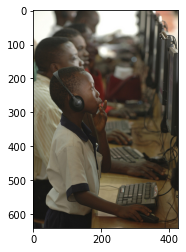

In [ ]:
fig, ax = plt.subplots()

im = plt.imread("data/train2017/000000554625.jpg")

rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

ax.imshow(im)
plt.show()

In [ ]:
a['face_box']

[483.21, 69.79, 124.40000000000003, 106.2]

In [ ]:
train_dict['annotations'][0]

{'segmentation': [[267.03,
   243.78,
   314.59,
   154.05,
   357.84,
   136.76,
   374.05,
   104.32,
   410.81,
   110.81,
   429.19,
   131.35,
   420.54,
   165.95,
   451.89,
   209.19,
   464.86,
   240.54,
   480,
   253.51,
   484.32,
   263.24,
   496.22,
   271.89,
   484.32,
   278.38,
   438.92,
   257.84,
   401.08,
   216.76,
   370.81,
   247.03,
   414.05,
   277.3,
   433.51,
   304.32,
   443.24,
   323.78,
   400,
   362.7,
   376.22,
   375.68,
   400,
   418.92,
   394.59,
   424.32,
   337.3,
   382.16,
   337.3,
   371.35,
   388.11,
   327.03,
   341.62,
   301.08,
   311.35,
   276.22,
   304.86,
   263.24,
   294.05,
   249.19]],
 'num_keypoints': 8,
 'area': 28292.08625,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  325,
  160,
  2,
  398,
  177,
  2,
  0,
  0,
  0,
  437,
  238,
  2,
  0,
  0,
  0,
  477,
  270,
  2,
  287,
  255,
  1,
  339,
  267,
  2,
  0,
  0,
  0,
  423,
  314,
  2,
  0,
  0,
 

In [134]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from torchvision.models import vgg16
from torchvision import models
from PIL import Image


device = "mps" if torch.backends.mps.is_available() else "cpu"

In [135]:
# Define model
class FaceNet(nn.Module):

    def __init__(self):
        super(FaceNet, self).__init__()

        self.model = models.vgg16(weights='DEFAULT')
        
        # Here you get the bottleneck/feature extractor
        # self.vgg_feature_extractor = nn.Sequential(*list(vgg.children())[:-1])

        # # Now you can include your classifiers
        # self.classifier1 = nn.Sequential(layers1)
        # self.classifier2 = nn.Sequential(layers2)

    # Set your own forward pass
    def forward(self, img, extra_info=None):
        x = self.model.forward(img)
        return x

model = FaceNet().to("cpu")#.to(device)
print(model)

FaceNet(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): 

In [136]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


(640, 427)


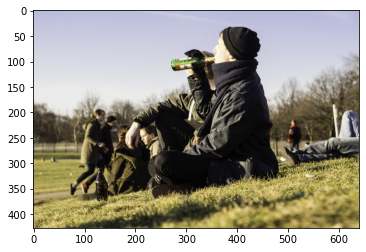

In [157]:

im = Image.open("data/hico_20160224_det/images/train2015/HICO_train2015_00000004.jpg")
print(im.size)

plt.imshow(im)
plt.show()

In [158]:

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(im)
X = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


with torch.no_grad():
    output = model(X)


In [159]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([1.7173e-04, 4.7762e-07, 1.7425e-07, 7.6516e-07, 1.2321e-06, 3.9207e-07,
        9.8230e-09, 1.6804e-04, 6.3542e-05, 9.7004e-06, 5.1439e-07, 1.2841e-06,
        4.0449e-07, 2.1748e-07, 9.8205e-06, 2.6471e-06, 9.3188e-07, 3.3238e-05,
        1.2494e-04, 1.6106e-06, 9.2194e-07, 2.7735e-04, 9.3648e-06, 2.3925e-04,
        4.2415e-06, 5.2456e-05, 1.5751e-06, 9.1878e-07, 1.0285e-04, 1.1857e-07,
        2.6735e-06, 6.6877e-06, 2.3868e-05, 1.6904e-06, 1.2360e-05, 7.5764e-06,
        3.6911e-06, 1.4146e-06, 1.8500e-06, 1.5989e-05, 4.2741e-07, 3.4649e-07,
        1.0759e-05, 1.0049e-05, 1.3591e-06, 1.0772e-05, 3.1257e-06, 9.3527e-06,
        5.8266e-06, 3.0186e-06, 2.1584e-05, 1.8213e-03, 6.7566e-07, 4.5206e-06,
        7.8003e-06, 1.3727e-06, 4.3499e-06, 3.7498e-07, 1.7890e-06, 1.0242e-05,
        7.4626e-07, 2.7745e-07, 4.2926e-07, 1.8726e-05, 4.0887e-06, 3.9666e-06,
        1.0735e-06, 1.5767e-05, 1.0373e-06, 3.8874e-07, 1.2502e-07, 6.6237e-05,
        9.1191e-07, 2.1452e-06, 8.7547e-

In [160]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

gasmask 0.17037099599838257
rifle 0.14736564457416534
parachute 0.12959980964660645
assault rifle 0.0827171579003334
ski mask 0.07578336447477341
